## Shuffling Arnold's Cat Assignment
## PHYS481, FALL 2020
## Yauheni Kalionau (30062335)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

## Answers to Questions: 
## Question 1: 
The most prominent difference is that lists can be modified, whereas tuples can not. 
This means that a variable assigned to the list will point to the same space in the memory even after we change the contents of our initial list. However, if we attempted to "change" contents of a tuple, 
then essentially a new space in memory will be created, and we will end up with two different tuples 
(in other words with two different variables) in the memory.

## Question 2:
Factorial calculation (52!):

In [2]:

list = [ind for ind in range(1,53)] #List with numbers, excluding 0.
fact = 1                            #needed to start iteration from 1
for elem in list:
    fact = fact*elem                 #simply looping through list with numbers each time multiplying by the next element in the list
    
print(fact)

80658175170943878571660636856403766975289505440883277824000000000000


## Question 3: 
A function to Overhand Shuffle a deck of cards predefined number of times:

In [9]:

def overhand_shuffle(deck, blocksize, max_iter):     #function takes deck, the size of the block and max number of iterations as parameters.
    """ The function applies
    overhand shuffle technique to randomize 
    the order of cards in the deck. """
        
    for niter in range(max_iter):
        deck_crop = deck[:blocksize]                 #cropping first "blocksize" (8 in this case) elements from the deck
        deck = deck[blocksize:]                      #Reducing deck in size by 8 elements from the beginning
        deck = deck + deck_crop                      #Adding first 8 elements of the initial deck to the end of the cropped version
              
    return deck

deck = []
for i in range(52):
    deck.append(i)
max_iter = 7
deck = overhand_shuffle(deck,8,max_iter)
print("The result of Overhand Shuffling for", max_iter,"times:", deck)
#print(overhand_shuffle.__doc__) #if needed

The result of Overhand Shuffling for 7 times: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 0, 1, 2, 3]


## Question 4:
Since the function "riffle_shuffle" performs exactly the same what a real riffle shuffling of a deck of cards does, then I believe the degree of randomness should be somewhat the same if in both cases cards are shuffled an equal number of times, but there are other important considerations which I discuss in "discussion" section. I can add that in case if a "widely believed notion" is false in regards "how many times a deck of cards has to be shuffled to randomize the order of cards", then yes, maybe shuffling cards 7 times is not enough. Also, there might be one more difference related to humans making mistakes, such as that cards do not always alternate one on top of another, but rather let's say two cards, then one, then maybe two cards again, then perhaps three - all due to the fact that for a human it's quite hard to add precisely one card from each half.

## Question 5: 
Comparing execution times of "catmap1" vs. "catmap2". I have used function "timeit()" to find the execution time for both functions and then compared the results.

In [5]:
def catmap1(square):
    """Apply Arnold's cat map to a square NxN numpy array
    using loops to modify pixels one at a time.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)  # require a square grid of at least 2x2=4 pixels
    
    result = square.copy()
    for x in range(nx):
        for y in range(ny):
            xx = x + y
            yy = x + 2*y
            result[x,y] = square[xx % nx, yy % ny]
            
    return result

In [6]:
def catmap2(square):
    """
    Apply Arnold's cat map to a square NxN numpy array 
    using array indexing.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    x, y = np.arange(nx), np.arange(ny)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    
    xx = xx + yy
    yy = yy + xx
    
    return square[xx % nx, yy % ny]   

In [7]:
setup_code = """pass"""
test_catmap1 = """def catmap1(square):
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)  # require a square grid of at least 2x2=4 pixels
    
    result = square.copy()
    for x in range(nx):
        for y in range(ny):
            xx = x + y
            yy = x + 2*y
            result[x,y] = square[xx % nx, yy % ny]
            
    return result"""
test_catmap2 = """def catmap2(square):
    
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    x, y = np.arange(nx), np.arange(ny)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    
    xx = xx + yy
    yy = yy + xx
    
    return square[xx % nx, yy % ny]"""   
time_cm1 = timeit.timeit(test_catmap1)
time_cm2 = timeit.timeit(test_catmap2)
print("Catmap1 function requires:",time_cm1,"sec to execute.")
print("Catmap2 function requires:",time_cm2,"sec to execute.")
if time_cm1 > time_cm2:
    print("Thus catmap2 function is faster than catmap1.")
elif time_cm1 < time_cm2:
    print("Thus catmap1 function is faster than catmap1.")

Catmap1 function requires: 0.11007510000000309 sec to execute.
Catmap2 function requires: 0.091738399999997 sec to execute.
Thus catmap2 function is faster than catmap1.


## Question 6:
A function to determine a number of iterations required to map an "N x N" image onto itself via application of Arnold's Transformation.

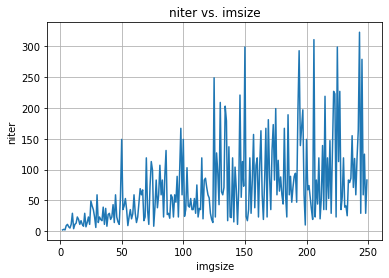

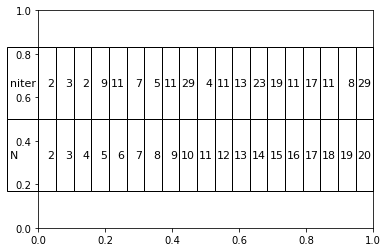

In [8]:
from PIL import Image
import requests
from io import BytesIO

image_url = r"https://www.jasondavies.com/catmap/catmap.jpg"
response = requests.get(image_url)
img =  Image.open(BytesIO(response.content))

nxnimag = []                                                       #list with cropped versions of 'original' image, all of different predefined dimensions (n x n)
coordlist = [] 
for ind in range(2,250):                                           #Notice that my range is from "2" to "250", not "256". More details in discussion.
    coordlist.append(ind)                                          #List with dimensions for cropped images, no pattern here, can choose any if dim < image_size
for i in coordlist:
    nxnimag.append(img.crop((0,0,i,i)))                            #Looping through predefined dimensions, cropping the 'original' image, asserting that the crooped
                                                                   #version is a square and appending the the list for cropped images.

def itercalc(img):

    ''' Function itercalc 
    calculates number of iterations
    required to map an N x N
    image onto itself by applying
    Arnold's Transformation'''

    data = np.array( img )
    test = np.array( img )
    N = data.shape[0]
    niter = 0
    for niter in range(500):
        data = catmap2( data )
        if np.any(data != test):
            niter += 1
        elif np.any(data == test):
            return niter, N


#Creating two lists with data for plotting a table - one with number of iterations (niter_reslist) and another with 
#corresponding image size (imgsize_reslist).
niter_reslist = []
imgsize_reslist = []
for elem in nxnimag:
    result, dim = itercalc(elem)
    niter_reslist.append(result)
    imgsize_reslist.append(dim)

#Plotting niter as a function of imgsize.
plt.plot(imgsize_reslist, niter_reslist, label='speed')
plt.title('niter vs. imsize')
plt.xlabel('imgsize')
plt.ylabel('niter')
plt.grid('on')
plt.show()


#Creating a table to store niter + imgsize data from N = 2 to N = 20.
tabledata = []
tabledata.append([])
tabledata.append([])
for ind in range(19):
    tabledata[0].append(niter_reslist[ind])
    tabledata[1].append(imgsize_reslist[ind])


#Plotting the table.
rowlabels = ['niter','N']
table = plt.table(cellText=tabledata, rowLabels = rowlabels, loc='center')
table.set_fontsize(14)
table.scale(1,6)
plt.show()

#The code takes some time to execute. Be patient.

## Discussion and conclusion: 
The biggest difference between the degree of randomness introduced by computers versus humans is that by default computers are non-random machines, whereas humans are generators of various sources of randomness, and randomness as a concept can be barely associated with computers since they were designed to produce a definite outcome. I'd like to also add the fact that humans do tend to produce many small errors, which might seem insignificant at first, but which nevertheless tend to accumulate and lead to drastic consequences in complex systems (i.e. "Butterfly Effect" - Edward Lorentz). So that, as long as we don't "artificially" introduce random errors to the computer code - human shuffling a deck will produce more random results. ("artificial" introduction of "random" errors sounds ambiguous and vague - I know).

As for my note regarding why I use the range (2,250) instead of (2,256) as asked by the assignment, is simply because my code fails to work when it reaches number "251" and I keep getting an error: "cannot unpack non-iterable NoneType object". I wasn't able to identify the source of the error, and I have tried using completely unrelated pictures - still the same result. I will appreciate if you can give me some feedback on this point.

Finally, this assignment matters to me becasue I'm very interested in studying how chaos affects complex systems, and this was a good overview of what is randomness as a concept and can it be even more random and chaotic, or is everything well-organized but overly complicated? Questions still unanswered, so there is pretty much to explore in those fields.